In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re


In [4]:
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/cb1222e506c1266b9cc808143ddbab82/raw/b2fe8213426159be7f9c8de108726d3d814153eb/mall_customers.csv')
print(df)

     customer_id  gender  age  annual_income  spending_score
0              1    Male   19             15              39
1              2    Male   21             15              81
2              3  Female   20             16               6
3              4  Female   23             16              77
4              5  Female   31             17              40
..           ...     ...  ...            ...             ...
195          196  Female   35            120              79
196          197  Female   45            126              28
197          198    Male   32            126              74
198          199    Male   32            137              18
199          200    Male   30            137              83

[200 rows x 5 columns]


In [5]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.tail()

,customer_id,gender,age,annual_income,spending_score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
df.shape

(200, 5)

In [9]:
df.isnull().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='age', ylabel='count'>

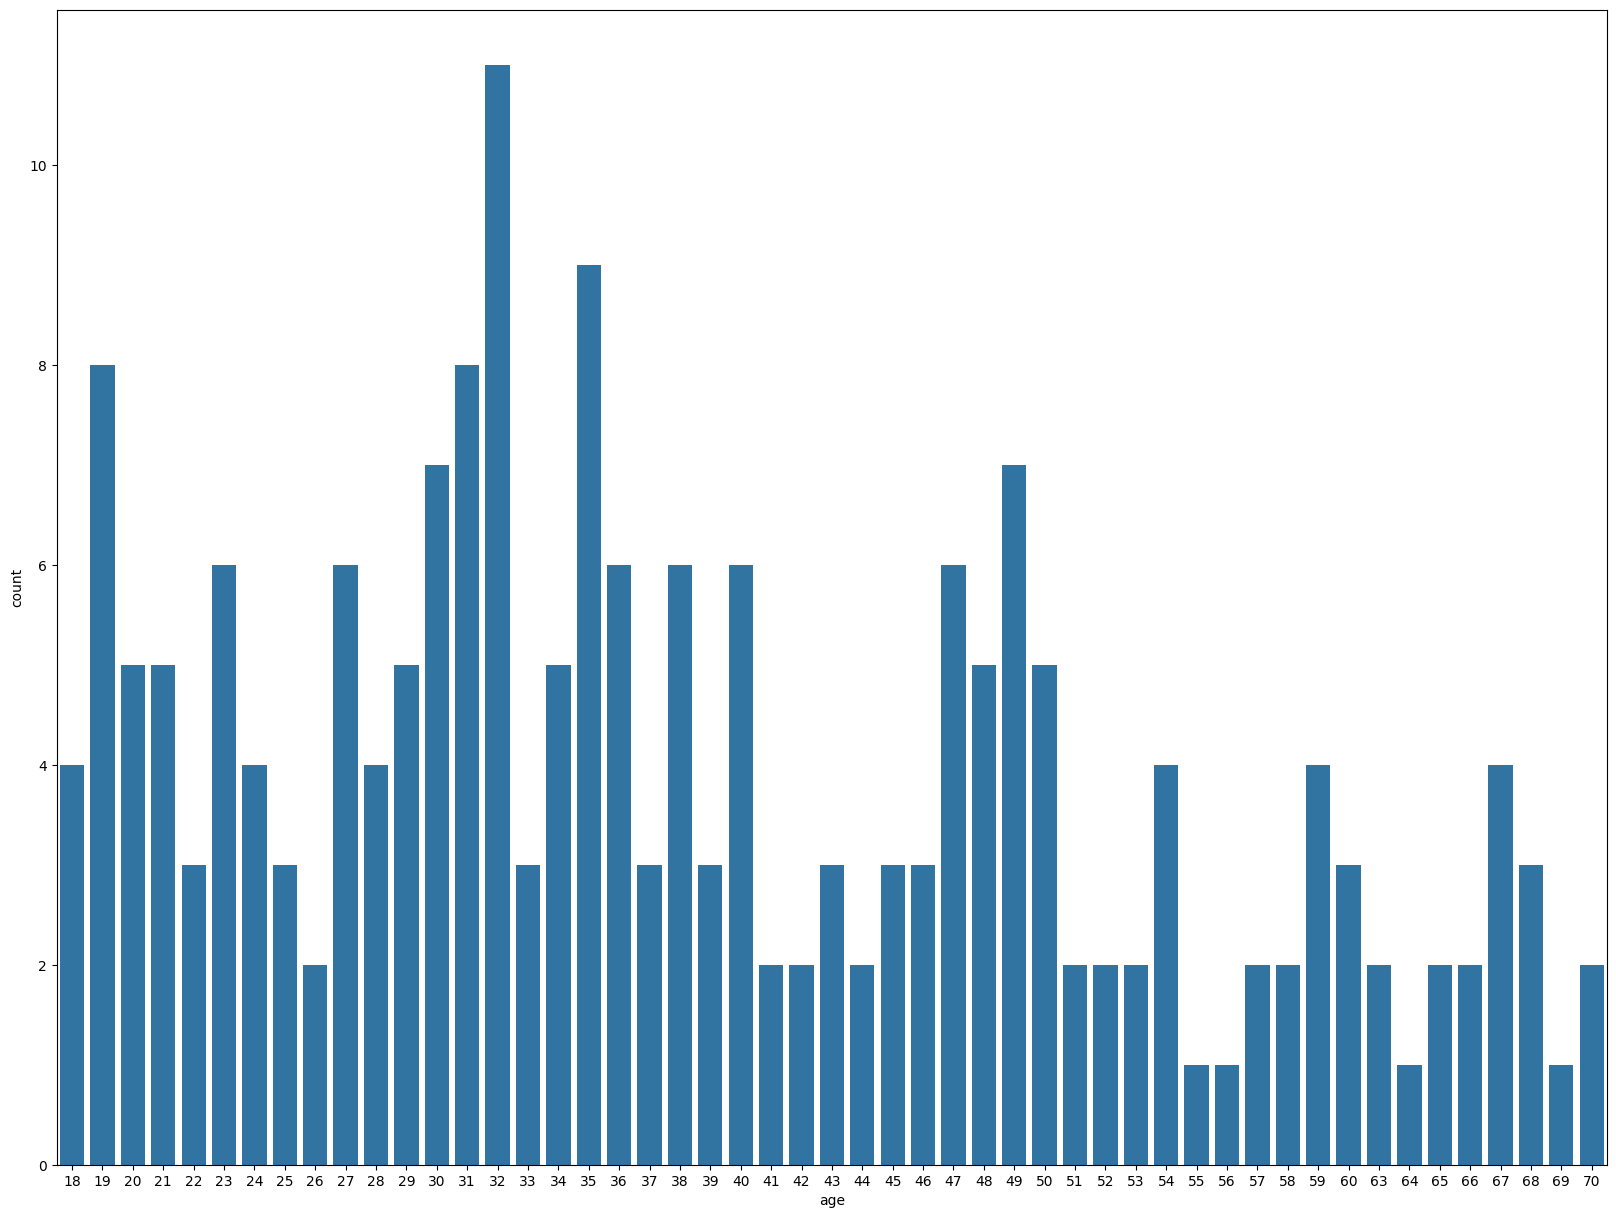

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
sns.countplot(data=df , x = 'age')

In [16]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


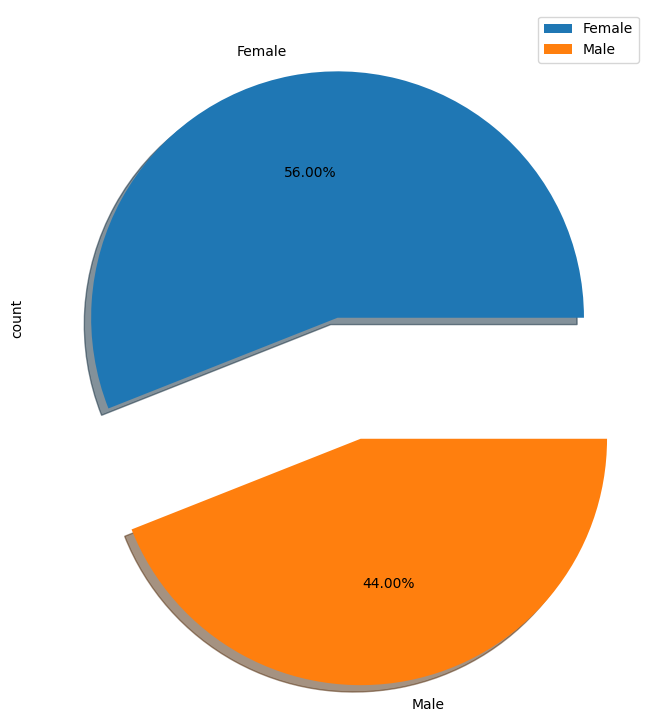

In [20]:
plt.figure(figsize= (8,8))
df.gender.value_counts().plot(kind='pie' , autopct = "%.2f%%" , shadow = True , explode = (0,0.5))
plt.legend()

In [21]:
df.head(2)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81


Text(0.5, 1.0, 'Distribution of Anuual Income')

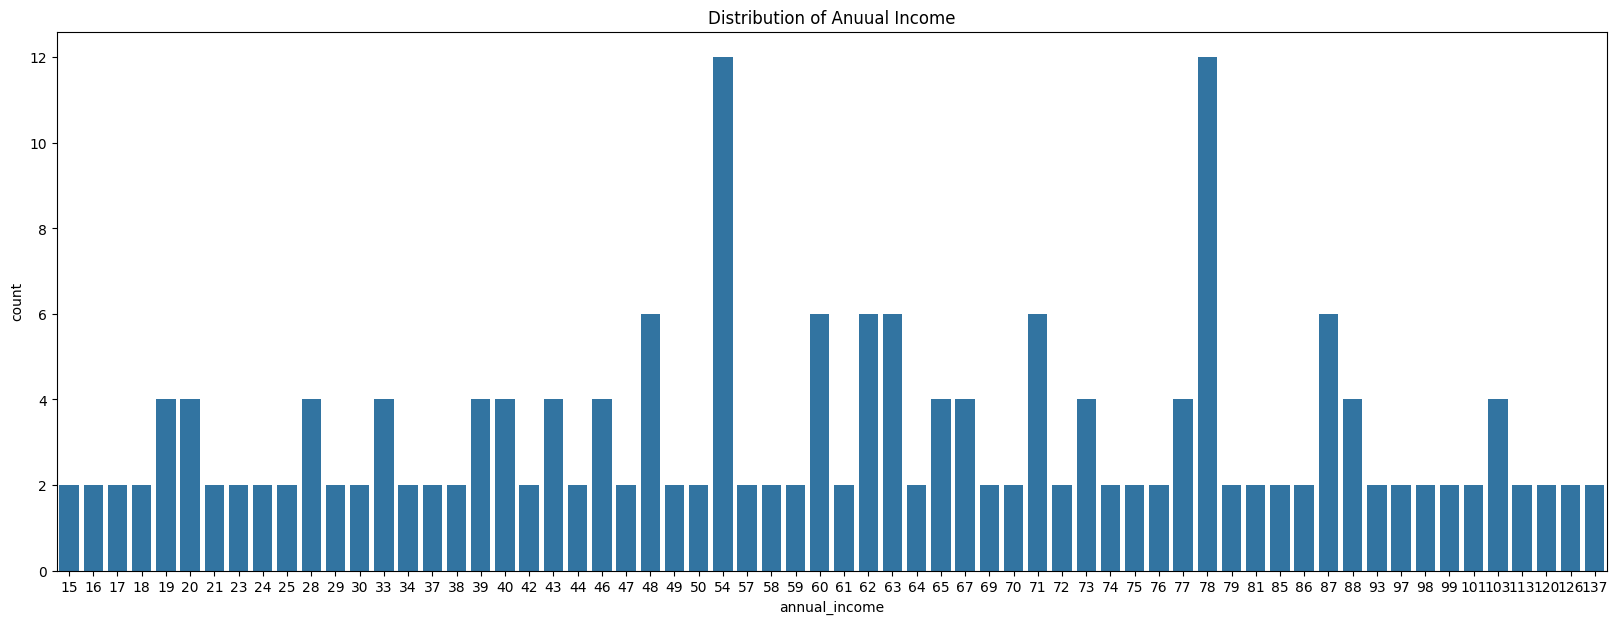

In [33]:
plt.figure(figsize=(20,7))
sns.countplot(data= df , x = 'annual_income')
plt.title('Distribution of Anuual Income')

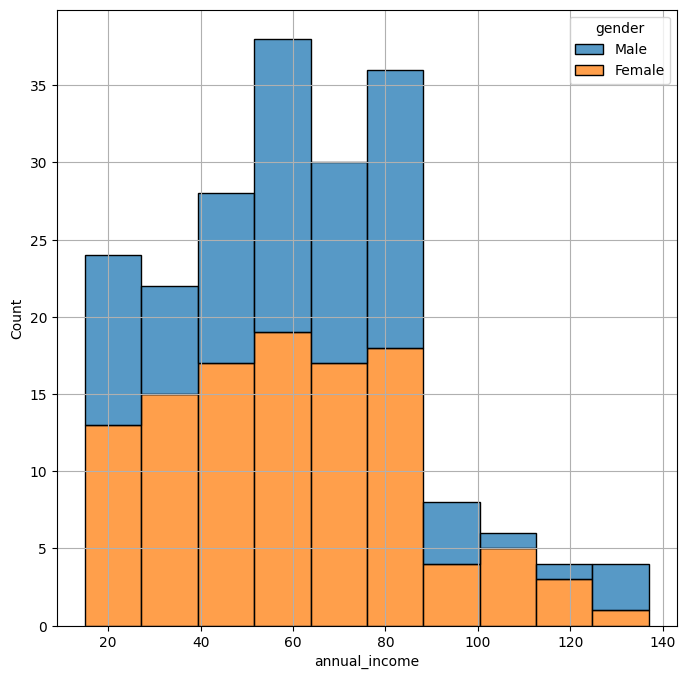

In [34]:
plt.figure(figsize = (8,8))
sns.histplot(df,x = 'annual_income' ,hue = 'gender' , multiple = 'stack')
plt.grid()

In [35]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


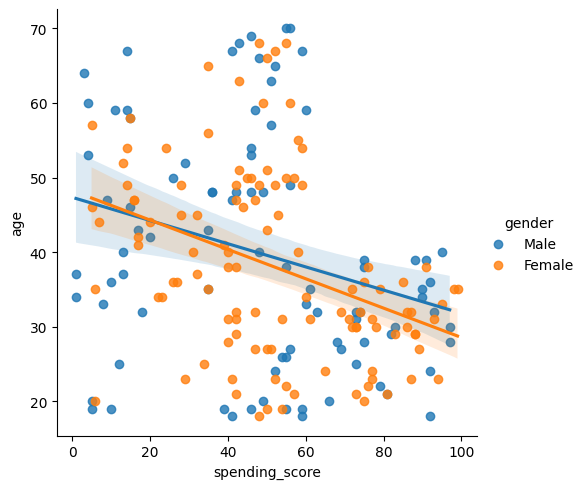

In [37]:
sns.lmplot(data=df,x = 'spending_score' , y = 'age' , hue = 'gender')

In [38]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df.gender = enc.fit_transform(df.gender)

In [39]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
df.drop('curstomer_id' , axis = 1, inplace = True)


In [45]:
from sklearn.cluster import KMeans
ssd = []
for i in range(1,11):
  Kmodel = KMeans(n_clusters=i, n_init=15,max_iter=500)
  Kmodel.fit(df)
  ssd.append(Kmodel.inertia_)

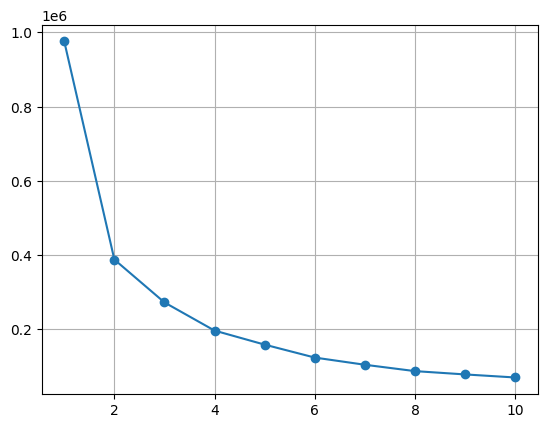

In [46]:
plt.plot(range(1,11) , ssd, marker = 'o')
plt.grid()

In [48]:
kmodel = KMeans(n_clusters = 6)
kmodel.fit(df)
prediction = kmodel.predict(df)
prediction

array([0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 4, 5, 4, 4,
       4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 3, 2,
       2, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [49]:
kmodel.cluster_centers_

array([[ 20.        ,   0.4       ,  43.9       ,  24.45      ,
         19.1       ],
       [166.82352941,   0.44117647,  32.26470588,  88.88235294,
         82.76470588],
       [109.2       ,   0.4       ,  38.95555556,  63.73333333,
         51.28888889],
       [164.88571429,   0.54285714,  41.25714286,  88.37142857,
         17.42857143],
       [ 64.43181818,   0.43181818,  46.40909091,  47.13636364,
         49.54545455],
       [ 23.09090909,   0.40909091,  25.27272727,  25.72727273,
         79.36363636]])

In [50]:
kmodel.labels_

array([0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 4, 5, 4, 4,
       4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 3, 2,
       2, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

<Axes: xlabel='annual_income', ylabel='spending_score'>

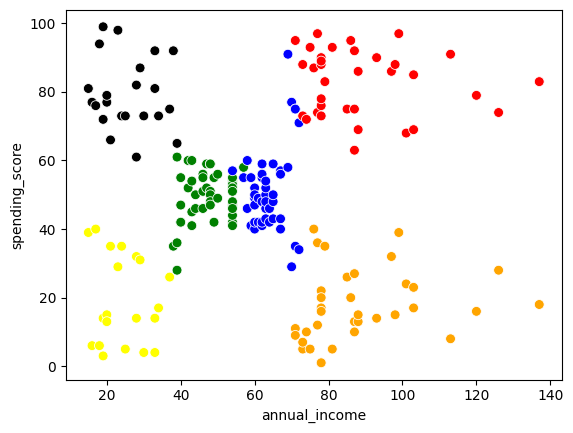

In [56]:
import numpy as np
color = np.array(['yellow' , 'red', 'blue' , 'orange' , 'green', 'black'] )
sns.scatterplot(x = df['annual_income'] , y= df['spending_score'] , c = color[kmodel.labels_] , s = 50)